In [1]:
import pandas as pd
data = pd.read_csv("data/processed_patient_data.csv")
data.head()

,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome,cpc,rosc_missing,shockable_rhythm_missing
0,A,53.0,Male,-1.0,True,True,33.0,Good,1,1,0
1,F,85.0,Female,7.0,False,False,No TTM,Good,1,0,0
2,A,48.0,Male,-1.0,True,True,36.0,Good,1,1,0
3,A,45.0,Male,-1.0,True,True,33.0,Good,1,1,0
4,D,51.0,Male,24.0,True,True,33.0,Good,1,0,0


In [2]:
data['outcome'] = data['outcome'].map({'Good': 1, 'Poor': 0})
print(data['outcome'].value_counts())

outcome
0    382
1    225
Name: count, dtype: int64


In [3]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}")

hospital : ['A' 'F' 'D' 'E' 'B']
age : [53.         85.         48.         45.         51.         73.
 39.         56.         41.         62.         55.         46.
 68.         54.         64.         67.         66.         79.
 71.         50.         78.         59.         52.         40.
 70.         82.         80.         69.         72.         83.
 88.         57.         74.         36.         34.         60.
 44.         65.         63.         26.         61.         76.
 47.         75.         29.         42.         20.         32.
 90.         38.         81.         31.         89.         19.
 23.         58.         35.         21.         43.         27.
 25.         49.         37.         30.         77.         61.16831683
 84.         86.         17.         16.         87.         22.
 28.        ]
sex : ['Male' 'Female']
rosc : [ -1.   7.  24.  20.   3.  37.  40.  60.  30.  15.   5.  18.  25.  10.
  70.  17.  50.  36.  27.  90.   2.  11.  34.  22.  33.  

In [4]:
data = data[(data['ohca'] != 'Unknown') & (data['shockable_rhythm'] != 'Unknown')]
data.drop(columns=['cpc','shockable_rhythm_missing','rosc_missing'], inplace=True)

In [5]:
data.head(5)

,hospital,age,sex,rosc,ohca,shockable_rhythm,ttm,outcome
0,A,53.0,Male,-1.0,True,True,33.0,1
1,F,85.0,Female,7.0,False,False,No TTM,1
2,A,48.0,Male,-1.0,True,True,36.0,1
3,A,45.0,Male,-1.0,True,True,33.0,1
4,D,51.0,Male,24.0,True,True,33.0,1


In [6]:
# use One-Hot Encoding
# in the case of TTM values 33, 36, and no TTM, 
# the encoding maintains their distinctiveness without suggesting any ranking.
ttm_dummies = pd.get_dummies(data['ttm'], prefix='ttm', drop_first=False)

data = pd.concat([data, ttm_dummies], axis=1)

data.drop(columns=['ttm'], inplace=True)
data.head(5)

,hospital,age,sex,rosc,ohca,shockable_rhythm,outcome,ttm_33.0,ttm_36.0,ttm_No TTM
0,A,53.0,Male,-1.0,True,True,1,True,False,False
1,F,85.0,Female,7.0,False,False,1,False,False,True
2,A,48.0,Male,-1.0,True,True,1,False,True,False
3,A,45.0,Male,-1.0,True,True,1,True,False,False
4,D,51.0,Male,24.0,True,True,1,True,False,False


In [7]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data)

df[['shockable_rhythm', 'ohca']] = df[['shockable_rhythm', 'ohca']].replace({'True': 1, 'False': 0})
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df[['ttm_33.0', 'ttm_36.0', 'ttm_No TTM']] = df[['ttm_33.0', 'ttm_36.0', 'ttm_No TTM']].astype(int)

le_hospital = LabelEncoder()
df['hospital'] = le_hospital.fit_transform(df['hospital'])
df.head(5)

C:\Users\86188\AppData\Local\Temp\ipykernel_25540\3721969630.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['shockable_rhythm', 'ohca']] = df[['shockable_rhythm', 'ohca']].replace({'True': 1, 'False': 0})


,hospital,age,sex,rosc,ohca,shockable_rhythm,outcome,ttm_33.0,ttm_36.0,ttm_No TTM
0,0,53.0,1,-1.0,1,1,1,1,0,0
1,4,85.0,0,7.0,0,0,1,0,0,1
2,0,48.0,1,-1.0,1,1,1,0,1,0
3,0,45.0,1,-1.0,1,1,1,1,0,0
4,2,51.0,1,24.0,1,1,1,1,0,0


In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column} : {unique_values}")

hospital : [0 4 2 3 1]
age : [53.         85.         48.         45.         51.         73.
 39.         56.         41.         62.         55.         46.
 68.         54.         64.         67.         66.         71.
 50.         78.         59.         40.         70.         82.
 52.         69.         72.         83.         88.         57.
 74.         36.         34.         60.         44.         63.
 26.         61.         76.         47.         79.         42.
 20.         75.         32.         90.         38.         81.
 31.         89.         19.         23.         58.         35.
 21.         43.         27.         25.         49.         37.
 65.         30.         77.         61.16831683 80.         84.
 86.         17.         29.         16.         87.         22.
 28.        ]
sex : [1 0]
rosc : [ -1.   7.  24.  20.   3.  37.  40.  60.  30.  15.   5.  18.  25.  10.
  70.  17.  50.  36.  27.  90.   2.  11.  34.  22.  33.  55.  16.  13.
  21.  12.  26. 

In [9]:
df['ohca'] = df['ohca'].astype(int)
df['shockable_rhythm'] = df['shockable_rhythm'].astype(int)

In [10]:
features = df.columns.difference(['outcome'], sort=False)
X = df[features]
y = df['outcome']
print(X.head(5))
print(y.head(5))

   hospital   age  sex  rosc  ohca  shockable_rhythm  ttm_33.0  ttm_36.0  \
0         0  53.0    1  -1.0     1                 1         1         0   
1         4  85.0    0   7.0     0                 0         0         0   
2         0  48.0    1  -1.0     1                 1         0         1   
3         0  45.0    1  -1.0     1                 1         1         0   
4         2  51.0    1  24.0     1                 1         1         0   

   ttm_No TTM  
0           0  
1           1  
2           0  
3           0  
4           0  
0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2'],  
    'max_iter': [100, 200, 300]
}

logistic = LogisticRegression()

logistic_grid = GridSearchCV(logistic, logistic_param_grid, cv=5)
logistic_grid.fit(X_train, y_train)

print("Best Logistic Regression parameters:", logistic_grid.best_params_)

d:\APP\python3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\APP\python3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Best Logistic Regression parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


d:\APP\python3.12\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "d:\APP\python3.12\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\APP\python3.12\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\APP\python3.12\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, s

In [13]:
from sklearn.svm import SVC

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)

print("Best SVM parameters:", svm_grid.best_params_)

Best SVM parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [14]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7]
}

xgb = XGBClassifier()
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=5)
xgb_grid.fit(X_train, y_train)

print("Best XGBoost parameters:", xgb_grid.best_params_)

Best XGBoost parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [15]:
from tensorflow import keras
from tensorflow.keras import layers

def create_ann():
    model = keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann()

ann_model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100


d:\APP\python3.12\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5388 - loss: 0.8845 - val_accuracy: 0.7089 - val_loss: 0.5720
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5931 - loss: 0.6580 - val_accuracy: 0.7468 - val_loss: 0.5986
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6114 - loss: 0.7020 - val_accuracy: 0.4430 - val_loss: 0.8278
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.6255 - val_accuracy: 0.4937 - val_loss: 0.7211
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5709 - loss: 0.6716 - val_accuracy: 0.5063 - val_loss: 0.8065
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6176 - val_accuracy: 0.5696 - val_loss: 0.6579
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.6193 - val_accuracy: 0.7215 - val_loss: 0.5594
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6418 - loss: 0.6328 - val_accuracy: 0.5063 - val_loss: 0.7

In [16]:
from sklearn.metrics import classification_report

y_pred_logistic = logistic_grid.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))

y_pred_svm = svm_grid.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

y_pred_xgb = xgb_grid.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32") 
print("ANN Classification Report:\n", classification_report(y_test, y_pred_ann))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       105
           1       0.66      0.60      0.63        63

    accuracy                           0.73       168
   macro avg       0.71      0.71      0.71       168
weighted avg       0.73      0.73      0.73       168

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72       105
           1       0.56      0.75      0.64        63

    accuracy                           0.68       168
   macro avg       0.68      0.70      0.68       168
weighted avg       0.72      0.68      0.69       168

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       105
           1       0.72      0.49      0.58        63

    accuracy                           0.74       168
   macro avg       0.73 

### Model Performance Summary

#### 1. Logistic Regression
- **Precision**: Moderate, with class 0 at **0.76** and class 1 at **0.58**
- **Recall**: Balanced recall for both classes, **0.75** for class 0 and **0.60** for class 1
- **Overall Accuracy**: **69%** (second lowest)
- **Suitability**: Provides balanced performance, suitable for cases needing consistent detection across classes, though precision for class 1 could be improved.

#### 2. SVM (Support Vector Machine)
- **Precision**: Higher for class 0 than class 1 (**0.81** vs **0.56**)
- **Recall**: Higher for class 1 (**0.75**), indicating a tendency to identify class 1 more often
- **Overall Accuracy**: **68%** (the lowest among models)
- **Suitability**: Suitable for cases where identifying class 1 is prioritized, though precision for class 1 could be improved.

#### 3. XGBoost
- **Precision & Recall**: Strong performance for class 0 (**0.74** precision, **0.89** recall), while recall for class 1 is lower (**0.49**)
- **Overall Accuracy**: **74%** (the highest among models)
- **Suitability**: Effective for identifying class 0, but may need tuning to improve recall for class 1.

#### 4. ANN (Artificial Neural Network)
- **Balanced Performance**: Moderate precision and recall for both classes; **0.81** precision for class 0 and **0.72** for class 1
- **Overall Accuracy**: **70%** (mid-range performance)
- **Suitability**: Useful for scenarios requiring balanced prediction but could benefit from additional tuning to improve accuracy.

Each model has distinct strengths:
- **Logistic Regression** offers stable but moderate performance across both classes.
- **SVM** is best for prioritizing recall in class 1.
- **XGBoost** performs strongly for class 0 but could benefit from tuning for class 1.
- **ANN** is balanced but could further improve with hyperparameter tuning.


In [19]:
import pandas as pd
import statsmodels.api as sm

# Convert X_train from a NumPy array to a DataFrame and specify column names
# Ensure these column names match those in your original data
column_names = ['hospital', 'age', 'sex', 'rosc', 'ohca', 'shockable_rhythm', 'ttm_33.0', 
                'ttm_36.0', 'ttm_No TTM']

X_train_df = pd.DataFrame(X_train, columns=column_names)  # Specify column names

# Check for zero-variance columns
zero_variance_columns = [col for col in X_train_df.columns if X_train_df[col].nunique() == 1]
print("Zero variance columns:", zero_variance_columns)

# Remove zero-variance columns if they exist
X_train_df = X_train_df.drop(columns=zero_variance_columns)

# Re-attempt fitting the logistic regression model
X_train_with_const = sm.add_constant(X_train_df)  # Add constant term
logit_model = sm.Logit(y_train, X_train_with_const).fit()  # Fit the model
print(logit_model.summary())  # Output the summary of the results

Zero variance columns: []
Optimization terminated successfully.
         Current function value: 0.535426
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                  391
Model:                          Logit   Df Residuals:                      382
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                  0.1897
Time:                        00:24:06   Log-Likelihood:                -209.35
converged:                       True   LL-Null:                       -258.35
Covariance Type:            nonrobust   LLR p-value:                 1.095e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7617        nan        nan        nan         n

In [23]:
import shap
import plotly.express as px

sample_size = 100
X_train_sample = X_train.sample(n=100, random_state=42)  # Random sampling
y_train_sample = y_train.loc[X_train_sample.index]

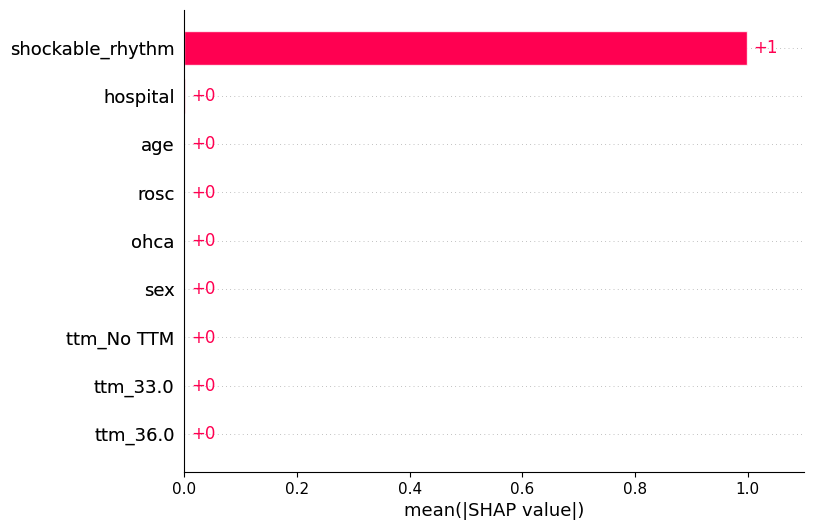

In [24]:
best_svm_model = svm_grid.best_estimator_

explainer = shap.Explainer(best_svm_model, X_train_sample)
shap_values = explainer(X_train_sample)

shap.plots.bar(shap_values)

In [25]:
best_xgb_model = xgb_grid.best_estimator_

explainer = shap.TreeExplainer(best_xgb_model)

shap_values = explainer.shap_values(X_train_sample)
# Create an Explanation object, including feature names
explainer_values = shap.Explanation(
    values=shap_values,
    base_values=explainer.expected_value,
    data=X_train_sample,
    feature_names=X_train_sample.columns 
)
shap_df = pd.DataFrame(shap_values, columns=X_train_sample.columns)

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)
mean_shap_df = mean_shap_values.reset_index()
mean_shap_df.columns = ['Feature', 'Mean SHAP Value']
fig = px.bar(
    mean_shap_df,
    x='Mean SHAP Value',
    y='Feature',
    title='Mean SHAP Value by Feature',
    orientation='h',  
    labels={'Mean SHAP Value': 'Mean SHAP Value', 'Feature': 'Feature'},
    color='Mean SHAP Value',  
    color_continuous_scale=px.colors.sequential.Plasma  
)

fig.show()